In [ ]:
import pyecharts

print(pyecharts.__version__)


1.9.1


In [7]:
from pyecharts.charts import Bar
bar=Bar()
bar.add_xaxis(['衬衣','羊毛衫','西装'])
bar.add_yaxis('商家',[5,20,40])
bar.render()

'e:\\美赛预备\\python数据处理学习课件\\render.html'

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType,SymbolType
from pyecharts.faker import Faker
import matplotlib.pyplot as plt


In [18]:
c=(
    Geo()
    .add_schema (maptype='china')
    .add(
       ' geo',
        [list(i)for i in zip(Faker.provinces,Faker.values ())],
        type_=ChartType.EFFECT_SCATTER#撻散点图
    )
    .set_series_opts (label_opts=opts.LabelOpts (is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title='GE0+涟漪散点图'))
)
c.render()

'e:\\美赛预备\\python数据处理学习课件\\render.html'

In [10]:
c=(
    Geo()
    .add_schema(maptype='china')
    .add(
        '',
        [('广州',50),('北京',60),('杭州',70),('重庆',80)],
        type_=ChartType.EFFECT_SCATTER,
        color='red'
    )
    .add(
        '',
        [('广州','上海'),('广州','北京'),('广州','杭州'),('广州','重庆')],
        type_=ChartType.LINES
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='GEO')
    )
)
c.render()

'e:\\美赛预备\\python数据处理学习课件\\render.html'

In [11]:
import pandas as pd
import numpy as np
df = pd.read_excel("E:\桌面\Catamarans.xlsx")
#删除缺失价格和评分人数的数据
#dropna()--删除缺失值
df.dropna(inplace=True)
df.to_excel("E:\桌面\movie_data.xlsx")

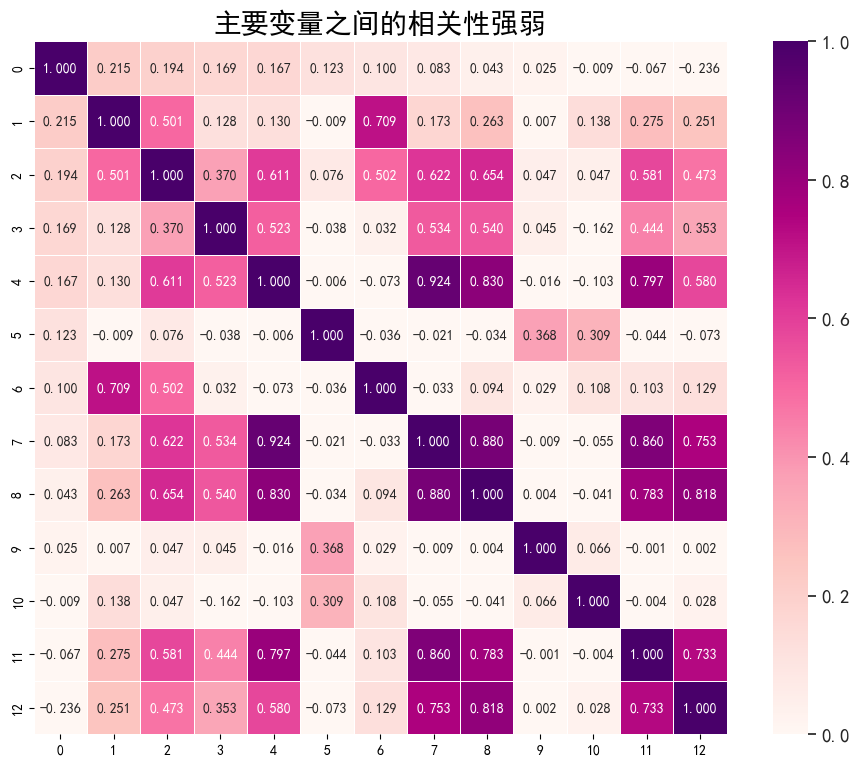

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====热力图
from matplotlib.ticker import FormatStrFormatter
encoding="utf-8"
data = pd.read_excel("E:\桌面\热力图数据.xlsx", encoding="utf-8")     #读取数据
data.drop_duplicates()
data.columns = [i for i in range(data.shape[1])]

# 计算两两属性之间的皮尔森相关系数
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))

# 返回按“列”降序排列的前n行
k = 30
cols = corrmat.nlargest(k, data.columns[0]).index

# 返回皮尔逊积矩相关系数
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt=".3f",
                 vmin=0,             #刻度阈值
                 vmax=1,
                 linewidths=.5,
                 cmap="RdPu",        #刻度颜色
                 annot_kws={"size": 10},
                 xticklabels=True,
                 yticklabels=True)             #seaborn.heatmap相关属性
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# plt.ylabel(fontsize=15,)
# plt.xlabel(fontsize=15)
plt.title("主要变量之间的相关性强弱", fontsize=20)
plt.show()
